In [2]:
import numpy as np 
import glob
from CPM_helpers1 import *
from MSD1cell import *
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style('darkgrid')

In [3]:
path = '../data/CPM_data/nofrc1/'
files = glob.glob(path+'*.txt')

for f in files:
    track = np.loadtxt(f)
    displ,_ = analyse_track(track)
    #print(np.average(dipl))
    print(sum(displ)/len(displ))

/home/lau/GIT/FRC_Thesis/CPM_code/CPM_helpers1.py:199: RuntimeWarning:

invalid value encountered in double_scalars



0.0005097450590758183
1.1375352393755875
0.0028254956627408916
0.3903681132618484
0.4851931982466541
0.0009877216068669172
0.40193281514658785
0.08468204337960229
7.903914205878906e-05
0.027301850164450737
0.5205036319511879
0.0
0.004934796591660141
0.4083108375877934
0.0
0.002962799205861597
0.0005879587861823067
0.4527336044426024
0.0
1.1437224603560188
0.0027108654509443502
0.4825238018543479
0.000765200713405104
0.0
0.4940615106063837
0.4378606627147915
0.47777240565314805
0.025570082554776732
0.430373625338798
0.41491128698730184
0.26323999058385567
0.01873012122391062
0.0011552986909809057
0.517364107508994
0.394192130424946
0.01688475948739378
0.0025281469939495197
0.0017621256668943848
0.2836401546779899
0.0010904309179354578
0.012862034678907628
0.016751873751778522
0.7149453845841891
0.6207656808055058
0.44190827818439693
0.15569542763914715
0.0273947070428407
0.0014242583965630583
0.007866147612944824
0.00013426687536569046
0.003210448795347981
0.0006937448381331088
0.097364

In [4]:
# merge dfs : 
general_df = pd.read_csv('../results/CPM_nofrc1.csv',index_col = 0)
print(general_df.head())
#volume_df = pd.read_csv('../results/volume_nofrc1.csv',index_col = 0)

def extract_params(f):
    numbers = '[-+]?\d*\.\d+|\d+'
    l,Max = f.split('MAX')
    lambd = int(re.findall(numbers,l)[0])
    m = int(re.findall(numbers,Max)[0][:-1])
    return lambd,m
    
volume_df['Lambda','Max_act'] = volume_df.FILE.apply(extract_params)
volume_df[['Lambda','Max_act']] = pd.DataFrame(volume_df['Lambda','Max_act'].tolist(), index=volume_df.index)
volume_df = volume_df.drop(('Lambda','Max_act'),axis = 1)
# volume_df[['Lambda','Max_act']] = volume.apply(
#     lambda row: extract_parmas(row['a'], row['b']), axis=1)

     Motility   Persistance  AutoSlope     P-val  Lambda  Max_act     Speed
0    0.000000      0.000000        NaN       NaN   10000       10  0.000907
1    0.004429      1.055514        NaN       NaN   10000       10  0.000953
2    0.000000      0.000000        NaN       NaN   10000       10  0.000777
3   10.009699   1165.431865  -0.000164  0.295606   10000     1256  0.159544
4  294.243270  36826.090430  -0.000121  0.434519   10000     1256  0.155243


In [5]:
result = pd.merge(general_df,volume_df, on = ['Lambda','Max_act'])
result = result.drop('FILE',axis = 1)
# result['Max_act'] = result['Max_act'].astype(str)
# result['Lambda'] = result['Lambda'].astype(str)

In [6]:
result.dtypes

Motility       float64
Persistance    float64
AutoSlope      float64
P-val          float64
Lambda           int64
Max_act          int64
Speed          float64
VOLUME         float64
dtype: object

In [1]:
# plot speed and vulume : 
#X = sns.diverging_palette(220, 20, n=7)
#sns.set_palette(pallete)

sns.set_palette("deep")
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Lambda',y = 'Speed',hue = 'Max_act',legend = 'full',data = result)
plt.show()

NameError: name 'sns' is not defined

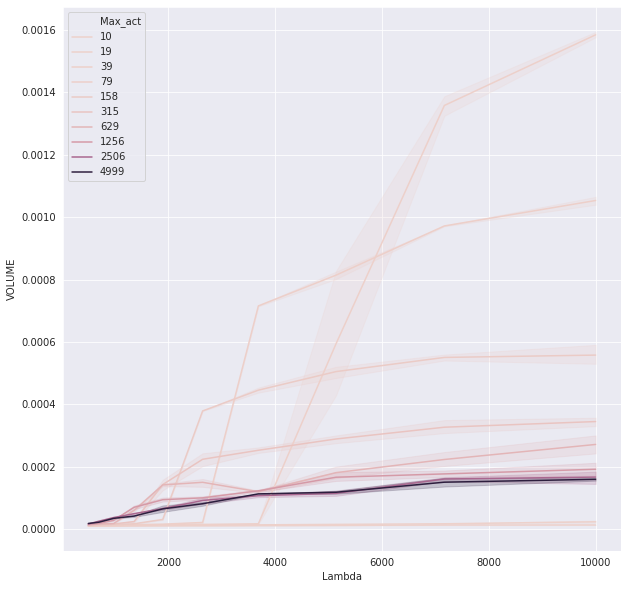

In [8]:
sns.set_palette("husl")
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Lambda',y = 'VOLUME',hue = 'Max_act',legend = 'full',data = result)
plt.show()

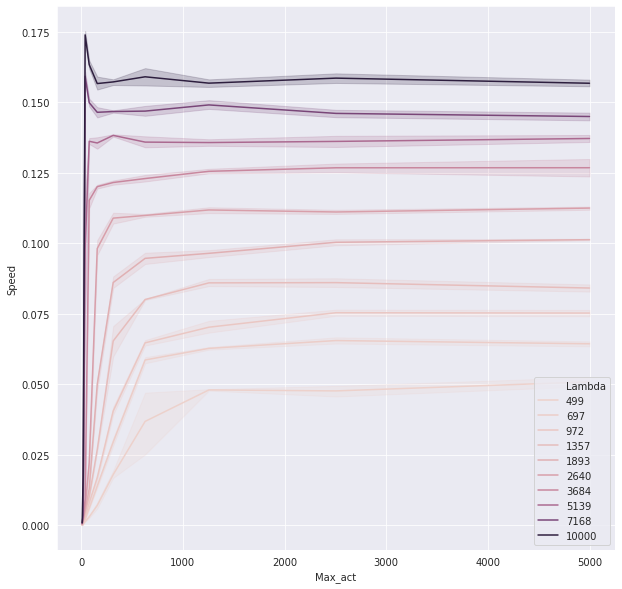

In [9]:
sns.set_palette("husl")
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Max_act',y = 'Speed',hue = 'Lambda',legend = 'full',data = result)
plt.show()


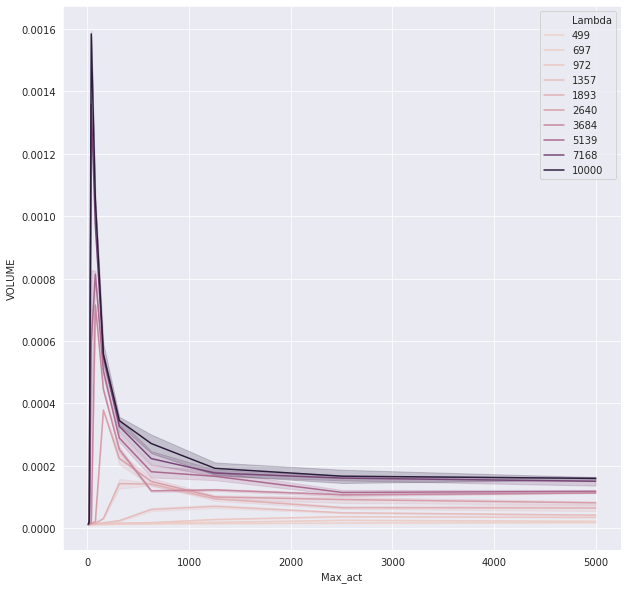

In [11]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'Max_act',y = 'VOLUME',hue = 'Lambda',legend = 'full',data = result)
plt.show()